In [1]:
import yt
import astropy.units as u
%matplotlib inline 
import matplotlib.pyplot as plt
import h5py

In [4]:
unit_base = {
    "length": (1.0, "pc"),
    "velocity": (100, "cm/s"),
    "mass": (1.0, "Msun"),
}
ds = yt.load('../data/snapshot_296.hdf5', unit_base=unit_base)
ad = ds.all_data()

yt : [INFO     ] 2024-02-23 08:07:40,041 ComovingIntegrationOn != 1 or (not found and OmegaLambda is 0.0), so we are turning off Cosmology.
yt : [INFO     ] 2024-02-23 08:07:40,072 Parameters: current_time              = 0.0002463474080710203
yt : [INFO     ] 2024-02-23 08:07:40,072 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-02-23 08:07:40,073 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-23 08:07:40,073 Parameters: domain_right_edge         = [8.16 8.16 8.16]
yt : [INFO     ] 2024-02-23 08:07:40,073 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2024-02-23 08:07:40,095 Allocating for 1.084e+07 particles
Loading particle index: 100%|█████████████████| 42/42 [00:00<00:00, 3217.37it/s]


In [27]:
#ds.derived_field_list

yt : [INFO     ] 2024-02-23 08:25:06,502 xlim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:25:06,502 ylim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:25:06,504 xlim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:25:06,504 ylim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:25:06,505 Making a fixed resolution buffer of (('PartType0', 'angular_momentum_magnitude')) 1000 by 1000
yt : [INFO     ] 2024-02-23 08:25:12,538 Making a fixed resolution buffer of (('PartType0', 'particle_velocity_magnitude')) 1000 by 1000



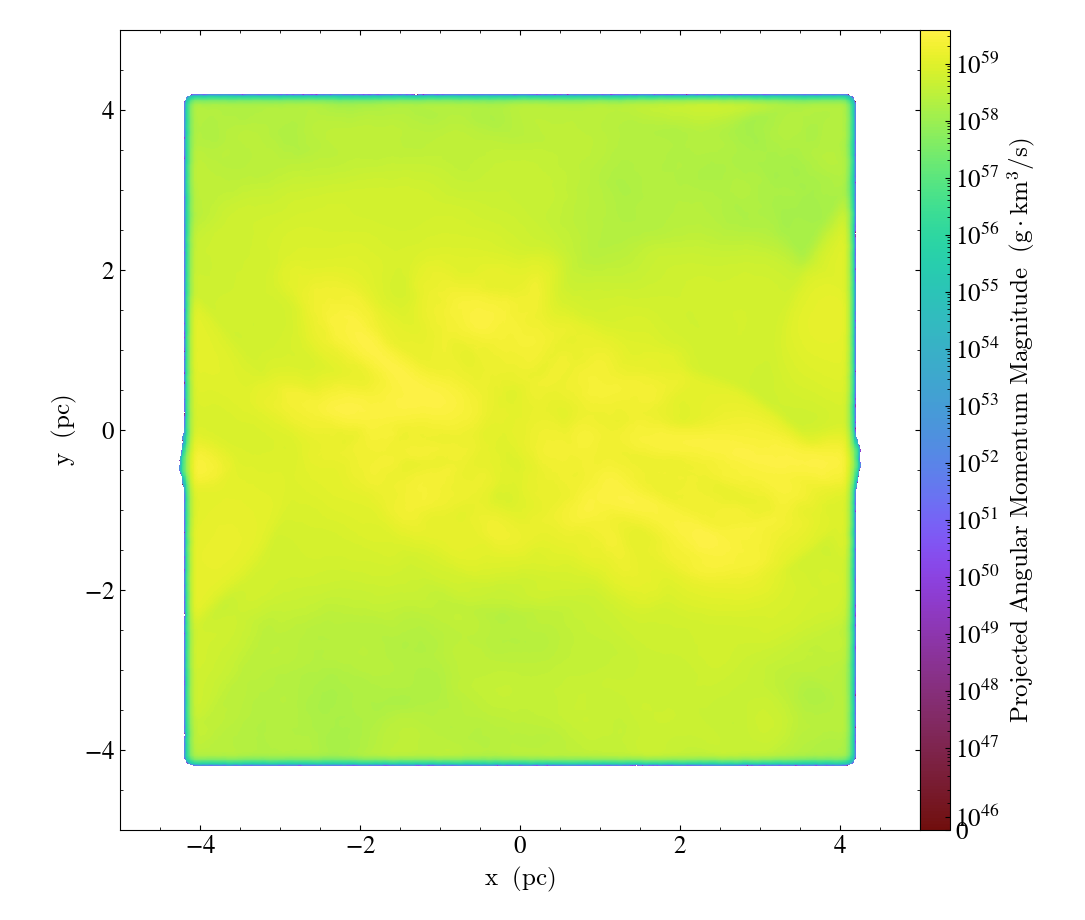
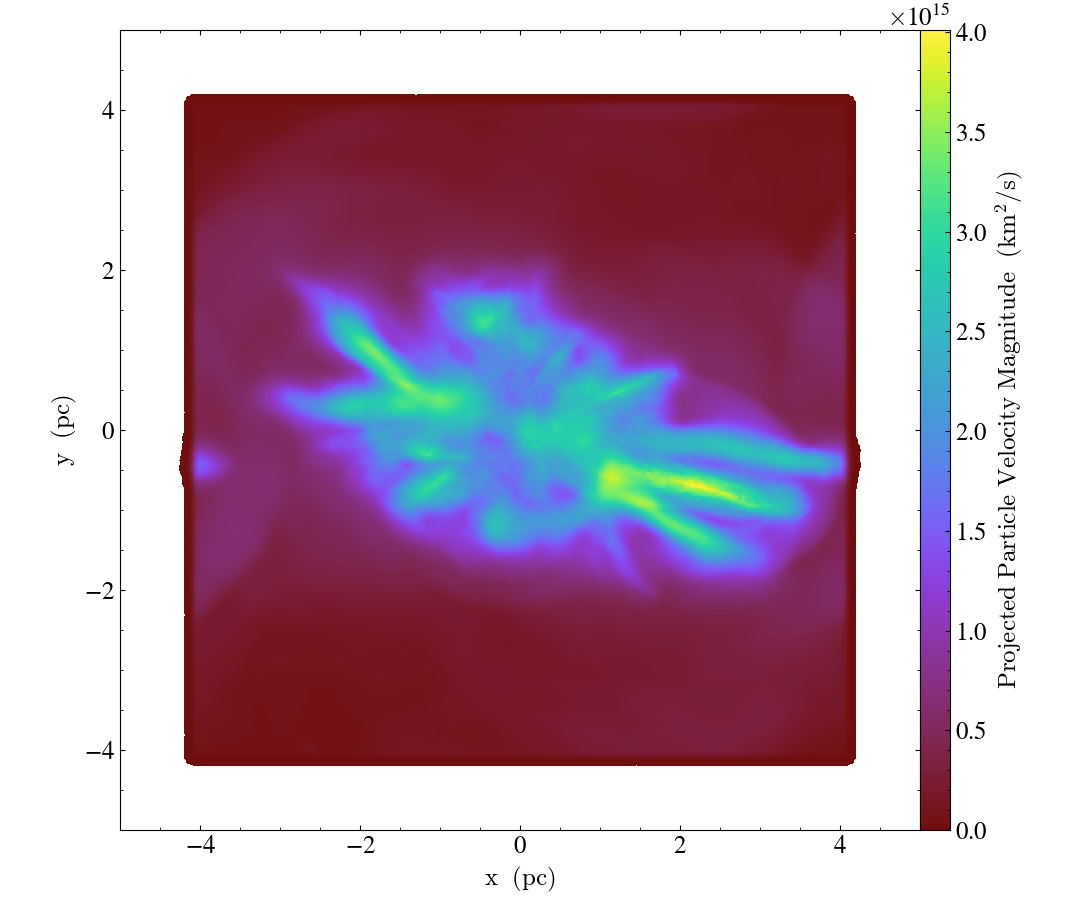

In [22]:
vmag = ad['PartType0', 'particle_velocity_magnitude'].in_units('km/s')
mmag = ad['PartType0', 'angular_momentum_magnitude'].in_units('cm**2*g/s')
fields = (vmag, mmag)
import yt
from yt.units import pc

prj = yt.ProjectionPlot(
    ds,
    "z",[('PartType0', 'particle_velocity_magnitude'), ('PartType0', 'angular_momentum_magnitude')],
    width=10 * pc,
    weight_field=None,
    buff_size=(1000, 1000),
)
prj.set_unit(('PartType0', 'particle_velocity_magnitude'), "km**2/s")
prj.set_unit(('PartType0', 'angular_momentum_magnitude'), "km**3*g/s")
prj

yt : [INFO     ] 2024-02-23 08:30:55,211 xlim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:30:55,212 ylim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:30:55,215 xlim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:30:55,215 ylim = -0.920000 9.080000
yt : [INFO     ] 2024-02-23 08:30:55,216 Making a fixed resolution buffer of (('PartType0', 'angular_momentum_magnitude')) 1000 by 1000
yt : [INFO     ] 2024-02-23 08:31:01,421 Making a fixed resolution buffer of (('PartType0', 'Density')) 1000 by 1000
yt : [INFO     ] 2024-02-23 08:31:06,443 Making a fixed resolution buffer of (('PartType0', 'particle_velocity_magnitude')) 1000 by 1000
yt : [INFO     ] 2024-02-23 08:31:11,811 Making a fixed resolution buffer of (('PartType0', 'Density')) 1000 by 1000



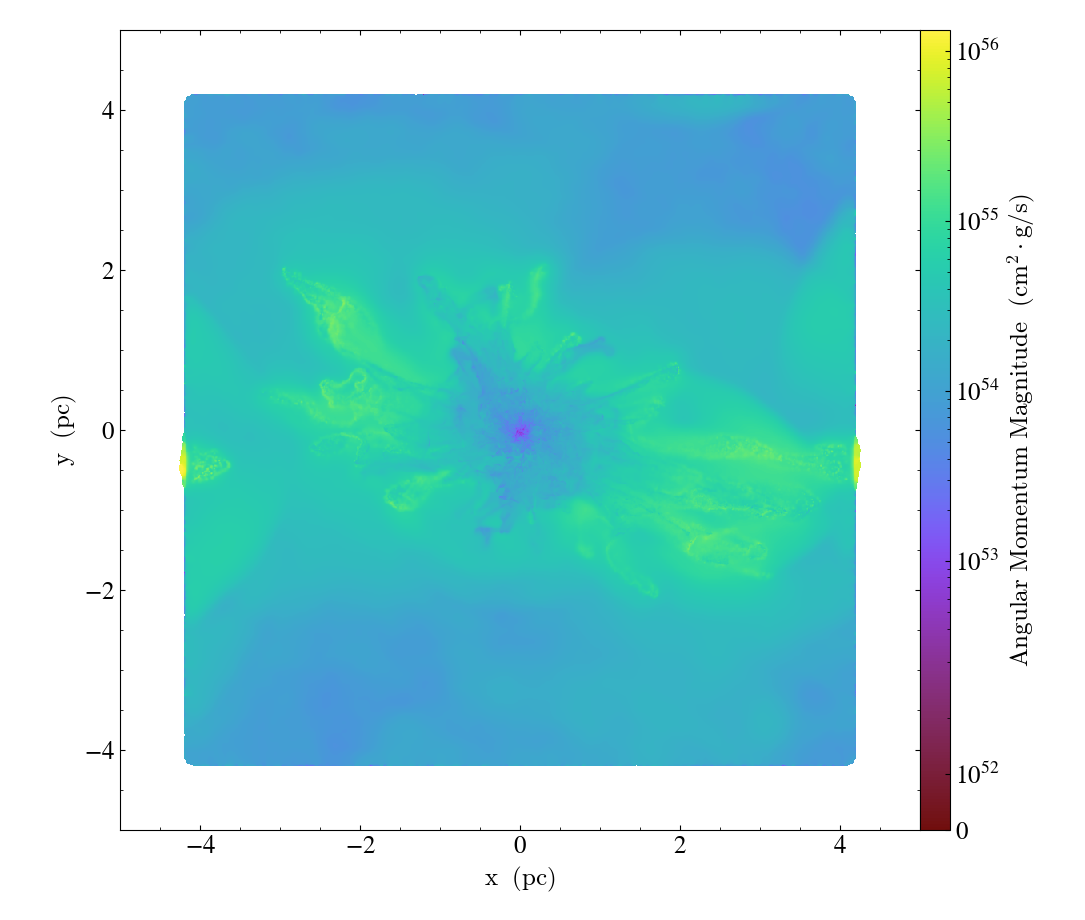
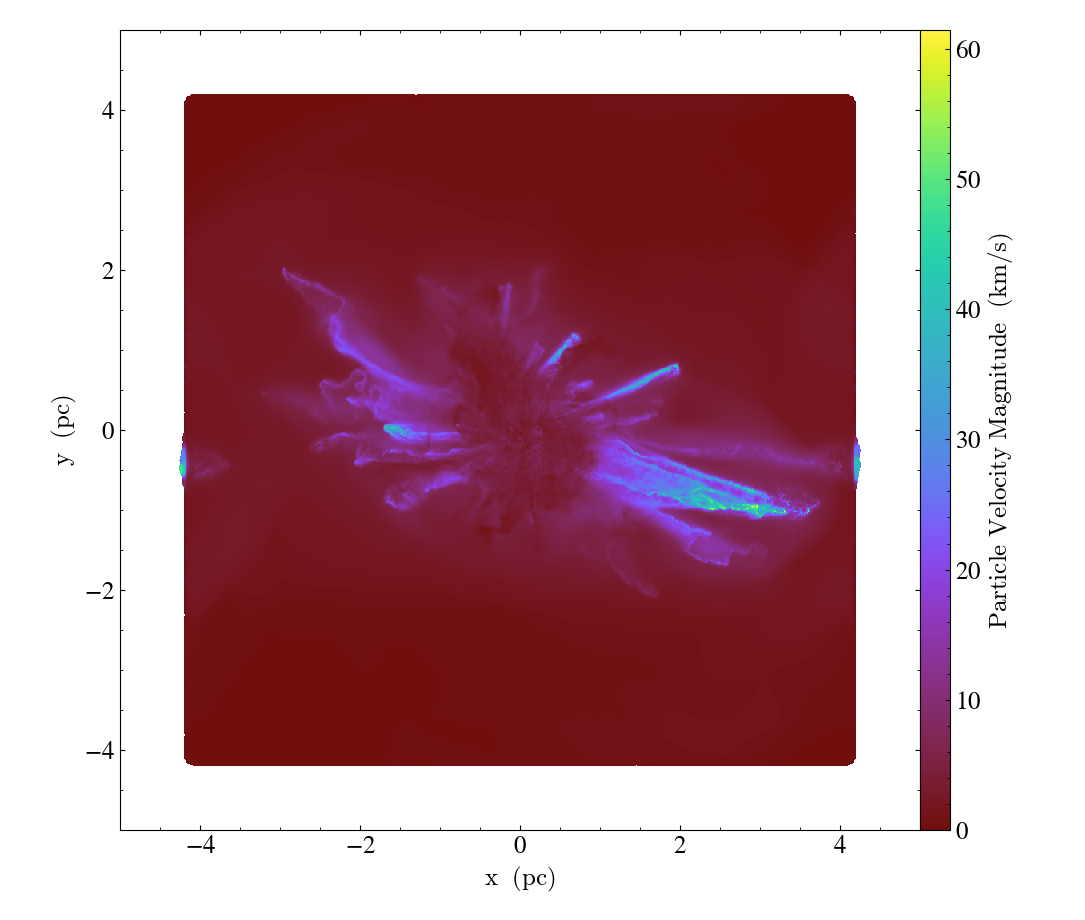

In [33]:
# with weighted field of density

prj = yt.ProjectionPlot(
    ds,
    "z",[('PartType0', 'particle_velocity_magnitude'), ('PartType0', 'angular_momentum_magnitude')],
    width=10 * pc,
    weight_field=('PartType0', 'Density'),
    buff_size=(1000, 1000),
)
prj.set_unit(('PartType0', 'particle_velocity_magnitude'), "km/s")
prj.set_unit(('PartType0', 'angular_momentum_magnitude'), "cm**2*g/s")
prj

Init signature: yt.ProjectionPlot(ds, normal, fields, *args, **kwargs) -> Union[ForwardRef('AxisAlignedProjectionPlot'), ForwardRef('OffAxisProjectionPlot')]
Docstring:     
A dispatch class for :class:`yt.visualization.plot_window.AxisAlignedProjectionPlot`
and :class:`yt.visualization.plot_window.OffAxisProjectionPlot` objects.  This
essentially allows for a single entry point to both types of projection plots,
the distinction being determined by the specified normal vector to the
slice.

The returned plot object can be updated using one of the many helper
functions defined in PlotWindow.

Parameters
----------

ds : :class:`yt.data_objects.static_output.Dataset`
    This is the dataset object corresponding to the
    simulation output to be plotted.
normal : int, str, or 3-element sequence of floats
    This specifies the normal vector to the projection.
    Valid int values are 0, 1 and 2. Corresponding str values depend on the
    geometry of the dataset and are generally given by